# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lenailo","key":"9e1f719571635e8a8090cc7d6e6f4c2c"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
#!cp /content/.kaggle/kaggle.json ~/root/.kaggle/kaggle.json
!cp kaggle.json ~/.kaggle/
#!kaggle datasets list

In [4]:
!kaggle config set -n path -v{/content}
!kaggle datasets list

- path is now set to: {/content}
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-05-05 14:54:57           4335  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2503  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            583  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            266  
dhruvildave/wikibooks-dataset              

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!kaggle competitions download -c avito-category-prediction -p /content

100% 840M/843M [00:29<00:00, 21.1MB/s]
100% 843M/843M [00:29<00:00, 30.4MB/s]
 96% 273M/284M [00:31<00:01, 8.44MB/s]
100% 284M/284M [00:31<00:00, 9.33MB/s]
 70% 5.00M/7.17M [00:00<00:00, 17.8MB/s]
100% 7.17M/7.17M [00:00<00:00, 23.9MB/s]


In [12]:
!unzip \*.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  train.csv.zip
  inflating: train.csv               

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

3 archives were successfully processed.


In [8]:
import pandas as pd

In [13]:
train = pd.read_csv('train.csv', nrows=500000)
test = pd.read_csv('test.csv')

In [14]:
train.head()

title  ... Category
0  Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год  ...       10
1                   Утюг утп 1000 ватт СССР 1987 год  ...       21
2                            Возвму машину с выкупом  ...      114
3                                        Полусапожки  ...       27
4                                  Босоножки кожаные  ...       27

[5 rows x 4 columns]

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   title          500000 non-null  object
 1   description    500000 non-null  object
 2   Category_name  500000 non-null  object
 3   Category       500000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 15.3+ MB


In [16]:
train.describe(include='object')

title          description              Category_name
count   500000               500000                     500000
unique  343874               482804                         50
top     Платье  В хорошем состоянии  Одежда, обувь, аксессуары
freq      5262                 1026                      90385

Вывод: Есть пропуски в столбце описание.

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411348 entries, 0 to 1411347
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   title        1411348 non-null  object
 1   description  1411347 non-null  object
 2   itemid       1411348 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 32.3+ MB


In [18]:
test.describe(include='object')

title          description
count   1411348              1411347
unique   900123              1349963
top      Платье  В хорошем состоянии
freq      14864                 2808

Вывод: Есть пропуски в столбце описание.

In [19]:
test = test.fillna('')
train = train.fillna('')

In [20]:
train.describe(include='object')

title          description              Category_name
count   500000               500000                     500000
unique  343874               482804                         50
top     Платье  В хорошем состоянии  Одежда, обувь, аксессуары
freq      5262                 1026                      90385

In [21]:
test.describe(include='object')

title          description
count   1411348              1411348
unique   900123              1349964
top      Платье  В хорошем состоянии
freq      14864                 2808

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [22]:
train['merged description'] = train['title'] + train['description']
train['merged description']

0         Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ...
1         Утюг утп 1000 ватт СССР 1987 годПродам/\n Фото...
2         Возвму машину с выкупомВозьму машину в аренду ...
3         Полусапожкиполусапожки в отличном состоянии, о...
4         Босоножки кожаныеКожаные(натур) босоножки Karl...
                                ...                        
499995    Баня под ключ 6x5м "Калевала"*СТРОИТЕЛЬСТВО БА...
499996                        Костюм спортивныйНа 140 рост!
499997    КосметичкаКосметичка ручной работы, выполнена ...
499998    Сумка Louis Vuitton keepall дорожная чёрнаяSAL...
499999    Наушники Bose QC 15 с ШумоподавлениемЗдравству...
Name: merged description, Length: 500000, dtype: object

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

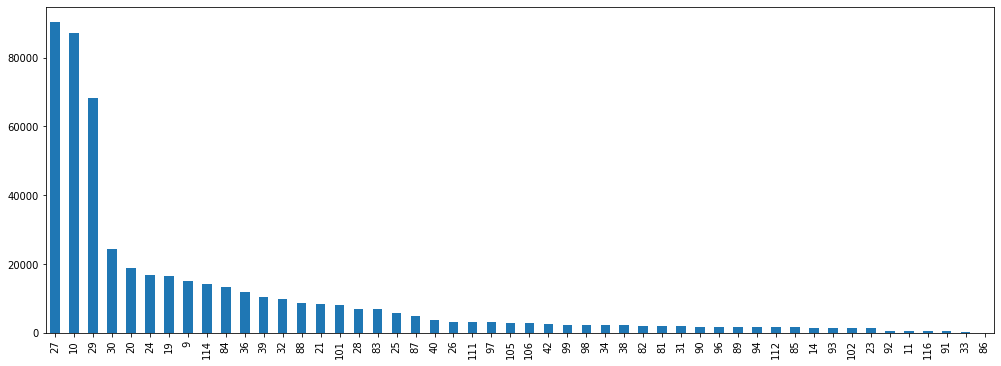

In [ ]:
train['Category'].value_counts().plot(kind='bar', figsize=(17, 6))

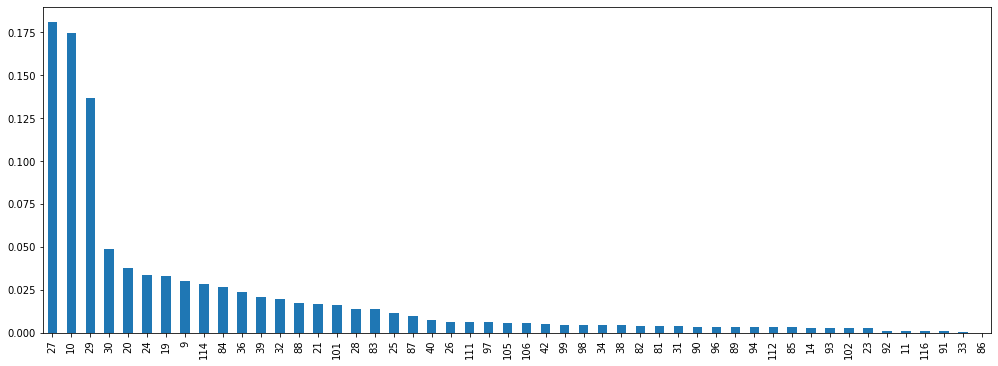

In [ ]:
train['Category'].value_counts(normalize=True).plot(kind='bar', figsize=(17, 6))

In [ ]:
train['Category'].value_counts(normalize=True)

27     0.180770
10     0.174278
29     0.136392
30     0.048788
20     0.037500
24     0.033604
19     0.032784
9      0.029950
114    0.028380
84     0.026862
36     0.023820
39     0.020488
32     0.019654
88     0.017392
21     0.016854
101    0.015860
28     0.014056
83     0.013734
25     0.011344
87     0.009854
40     0.007636
26     0.006366
111    0.006328
97     0.006110
105    0.005846
106    0.005430
42     0.005114
99     0.004518
98     0.004518
34     0.004452
38     0.004262
82     0.003994
81     0.003938
31     0.003604
90     0.003548
96     0.003152
89     0.003150
94     0.003138
112    0.003128
85     0.003032
14     0.002918
93     0.002872
102    0.002782
23     0.002746
92     0.001240
11     0.001220
116    0.001008
91     0.000884
33     0.000676
86     0.000026
Name: Category, dtype: float64

###Вывод 
самая распространённая категория - 27, (более 18%), самая редкая - 86 (0,0026%). Судя по диаграмме, есть три самых крупных категории, лидирующих с большим отрывом. Что касается других, то разброс значительно скромнее.

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
count_vectorizer = CountVectorizer()
vectorized_desc = count_vectorizer.fit_transform(train['merged description'])

In [31]:
print(f'Размеры полученной матрицы: {vectorized_desc.shape[0]} на {vectorized_desc.shape[1]}')

Размеры полученной матрицы: 500000 на 827793


## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [38]:
count_vectorizer.vocabulary_

{'эбу': 817268,
 'renault': 288398,
 'nissan': 267936,
 'dci': 199476,
 'delphi': 200217,
 '2001': 47273,
 '2008': 49305,
 'годкомплект': 414929,
 'мозги': 557533,
 'компьютер': 503694,
 'мотора': 560925,
 'двигателя': 424829,
 'коммутатор': 502210,
 'электронный': 820900,
 'блок': 366746,
 'управления': 775633,
 'двигателем': 424740,
 'для': 437369,
 'рено': 691523,
 'kangoo': 240593,
 'канго': 483292,
 'кангу': 483295,
 'меган': 546685,
 'сценик': 745923,
 'laguna': 246281,
 'лагуна': 523348,
 'clio': 190464,
 'клио': 494663,
 'micra': 259172,
 'ниссан': 580944,
 'микра': 552190,
 'другие': 443593,
 'дизель': 435021,
 'топливной': 759573,
 'аппаратурой': 349244,
 'делфи': 428808,
 'оригинал': 600976,
 'отличное': 607387,
 'состояние': 729514,
 'проверенные': 664155,
 'гарантией': 407846,
 'на': 566174,
 'все': 397597,
 'запчасти': 460632,
 'предоставляется': 656332,
 'гарантия': 408010,
 'возможна': 393634,
 'установка': 777453,
 'более': 368806,
 'подробно': 639867,
 'разделе': 6803

In [39]:
import re

In [40]:
re.findall('\d+', ' '.join([word[0] for word in list(count_vectorizer.vocabulary_.items())]))

['2001',
 '2008',
 '1000',
 '1987',
 '350',
 '405',
 '450',
 '10',
 '40',
 '20',
 '42',
 '44',
 '2000',
 '2006',
 '27808641',
 '14',
 '500',
 '00',
 '30',
 '39',
 '32',
 '32',
 '25',
 '2012',
 '43018',
 '00',
 '3744',
 '1',
 '2019',
 '18',
 '29',
 '2019',
 '05',
 '59',
 '5',
 '15',
 '000',
 '18',
 '4000',
 '150',
 '2010',
 '2017',
 '60',
 '25',
 '40000',
 '46',
 '48',
 '200',
 '100',
 '3000',
 '35',
 '1866',
 '1880',
 '250',
 '2009',
 '3500',
 '1855',
 '1881',
 '1876',
 '1878',
 '1872',
 '50',
 '1918',
 '1919',
 '1921',
 '1922',
 '1923',
 '1924',
 '1925',
 '1926',
 '1928',
 '1932',
 '1934',
 '1937',
 '1938',
 '1947',
 '1957',
 '7000',
 '1769',
 '2019',
 '120',
 '12',
 '55',
 '2',
 '34',
 '9',
 '23',
 '2100',
 '65',
 '3',
 '45',
 '3',
 '26',
 '2700',
 '75',
 '3',
 '53',
 '9',
 '30',
 '3100',
 '625',
 '80025',
 '5',
 '16',
 '5',
 '3',
 '70',
 '86',
 '92',
 '999',
 '150',
 '5',
 '56',
 '7',
 '03',
 '09',
 '2003',
 '1',
 '0012027',
 '21',
 '9',
 '50',
 '12',
 '14',
 '23',
 '171',
 '58',
 '

In [41]:
num = len(re.findall('\d+', ' '.join([word[0] for word in list(count_vectorizer.vocabulary_.items())])))
print(f'Количество слов с цифрой в начале {num}')

Количество слов с цифрой в начале 295299


In [42]:
re.findall(r'\W', '_'.join([word[0] for word in list(count_vectorizer.vocabulary_.items())]))

[]

In [43]:
num = len(re.findall('\W', '_'.join([word[0] for word in list(count_vectorizer.vocabulary_.items())])))
print(f'Количество слов, начинающихся на знак пунктуации {num}')

Количество слов, начинающихся на знак пунктуации 0


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [23]:
!pip install nltk
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
russian_stopwords = set(stopwords.words('russian'))
stemmer = SnowballStemmer('russian') 

In [26]:
def custom_tokenize(string:str) -> list:
  tokens = set(nltk.word_tokenize(re.sub(r'[0-9\!#$%&\'()*+,\-\./:;<=>?@\[\]\^_`{|}~]+\w*', ' ', string.lower())))
  return [stemmer.stem(w) for w in tokens - russian_stopwords]#list(map())



In [44]:
custom_tokenize(train['merged description'].iloc[0])

['мотор',
 'nissa',
 'аппаратур',
 'документ',
 'компьютер',
 'состоян',
 'запчаст',
 'компан',
 'запчаст',
 'росс',
 'автомобил',
 'микр',
 'мега',
 'двигател',
 'годкомплект',
 'гарант',
 'пробег',
 'дета',
 'подробн',
 'платеж',
 'delph',
 'kango',
 'эб',
 'канг',
 'нисса',
 'легальн',
 '»',
 'возможн',
 'репутац',
 'торгу',
 'топливн',
 'компан',
 'рен',
 'регион',
 'renault',
 'раздел',
 'управлен',
 'micr',
 '«',
 'дизел',
 'дорож',
 'таможен',
 'предоставля',
 'блок',
 'проверен',
 'таможен',
 'cli',
 'lagun',
 'наложн',
 'сценик',
 'двигател',
 'гарант',
 'электрон',
 'отправля',
 'сво',
 'установк',
 'друг',
 'б',
 'отличн',
 'оригина',
 'контрактн',
 'транспортн',
 'dci',
 '—',
 'делф',
 'налич',
 'союз',
 'коммутатор']

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [45]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [47]:
X = train['merged description']
y = train['Category']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
vec = CountVectorizer(tokenizer=custom_tokenize)
bow = vec.fit_transform(x_train) 
bow_test = vec.transform(x_test)


In [48]:
clf = SGDClassifier(random_state=13)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           9       0.96      0.86      0.91      3689
          10       0.90      0.96      0.93     21872
          11       0.87      0.79      0.83       151
          14       0.93      0.57      0.71       388
          19       0.76      0.77      0.76      4077
          20       0.75      0.79      0.77      4724
          21       0.76      0.77      0.76      2093
          23       0.96      0.88      0.91       371
          24       0.99      0.99      0.99      4203
          25       1.00      0.99      1.00      1373
          26       0.97      1.00      0.99       761
          27       0.79      0.90      0.84     22609
          28       0.86      0.81      0.83      1724
          29       0.82      0.83      0.83     17071
          30       0.77      0.78      0.78      6197
          31       0.91      0.75      0.82       429
          32       0.79      0.76      0.77      2436
          33       0.67    

In [50]:
accuracy_score(y_test, pred)

0.833528

## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vec = TfidfVectorizer(tokenizer=custom_tokenize)
tf_idf_bow = tf_idf_vec.fit_transform(x_train)
tf_idf_bow_test = tf_idf_vec.transform(x_test)

In [ ]:
tf_idf_clf = SGDClassifier(random_state=13)
tf_idf_clf.fit(tf_idf_bow, y_train)
pred = tf_idf_clf.predict(tf_idf_bow_test)

In [ ]:
print(f'Accuracy для TfidfVectorizer {accuracy_score(y_test, pred)}')

Accuracy для TfidfVectorizer 0.802936


In [ ]:
bounded_tf_idf_vec = TfidfVectorizer(tokenizer=custom_tokenize, max_df=0.9)
bounded_tf_idf_bow = bounded_tf_idf_vec.fit_transform(x_train)
bounded_tf_idf_bow_test = bounded_tf_idf_vec.transform(x_test)

In [ ]:
bounded_tf_idf_clf = SGDClassifier(random_state=13)
bounded_tf_idf_clf.fit(bounded_tf_idf_bow, y_train)
bounded_tf_idf_pred = bounded_tf_idf_clf.predict(bounded_tf_idf_bow_test)

In [ ]:
print(f'Accuracy для TfidfVectorizer с ограничением {accuracy_score(y_test, bounded_tf_idf_pred)}')

Accuracy для TfidfVectorizer с ограничением 0.802936


Вывод: на выборке из даннызх 500000 строк лучше качество не стало

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

In [ ]:
hash_vec = HashingVectorizer(tokenizer=custom_tokenize, n_features=30000)
hash_bow = hash_vec.fit_transform(x_train)
hash_bow_test = hash_vec.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
hash_clf = SGDClassifier(random_state=13)
hash_clf.fit(hash_bow, y_train)
hash_pred = hash_clf.predict(hash_bow_test)

In [ ]:
print(f'Accuracy для HashingVectorizer с ограничением {accuracy_score(y_test, hash_pred)}')

Accuracy для HashingVectorizer с ограничением 0.780656


Лучший результат оказался у CountVectorizer'а. Его и буду использовать.

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [51]:
test['merged description'] = test['title'] + ' ' + test['description']
bow_test_subm = vec.transform(test['merged description'])

In [52]:
from google.colab import files

In [57]:
subm_pred = clf.predict(bow_test_subm)
test['Category'] = subm_pred

In [67]:
test.rename(columns={'itemid':'Id'}, inplace=True)

In [73]:
test[['Id', 'Category']].to_csv('submission.csv', index=False)

In [74]:
!kaggle competitions submit -c avito-category-prediction -f submission.csv -m "Message"

100% 18.7M/18.7M [00:10<00:00, 1.84MB/s]
Successfully submitted to Avito Category Prediction

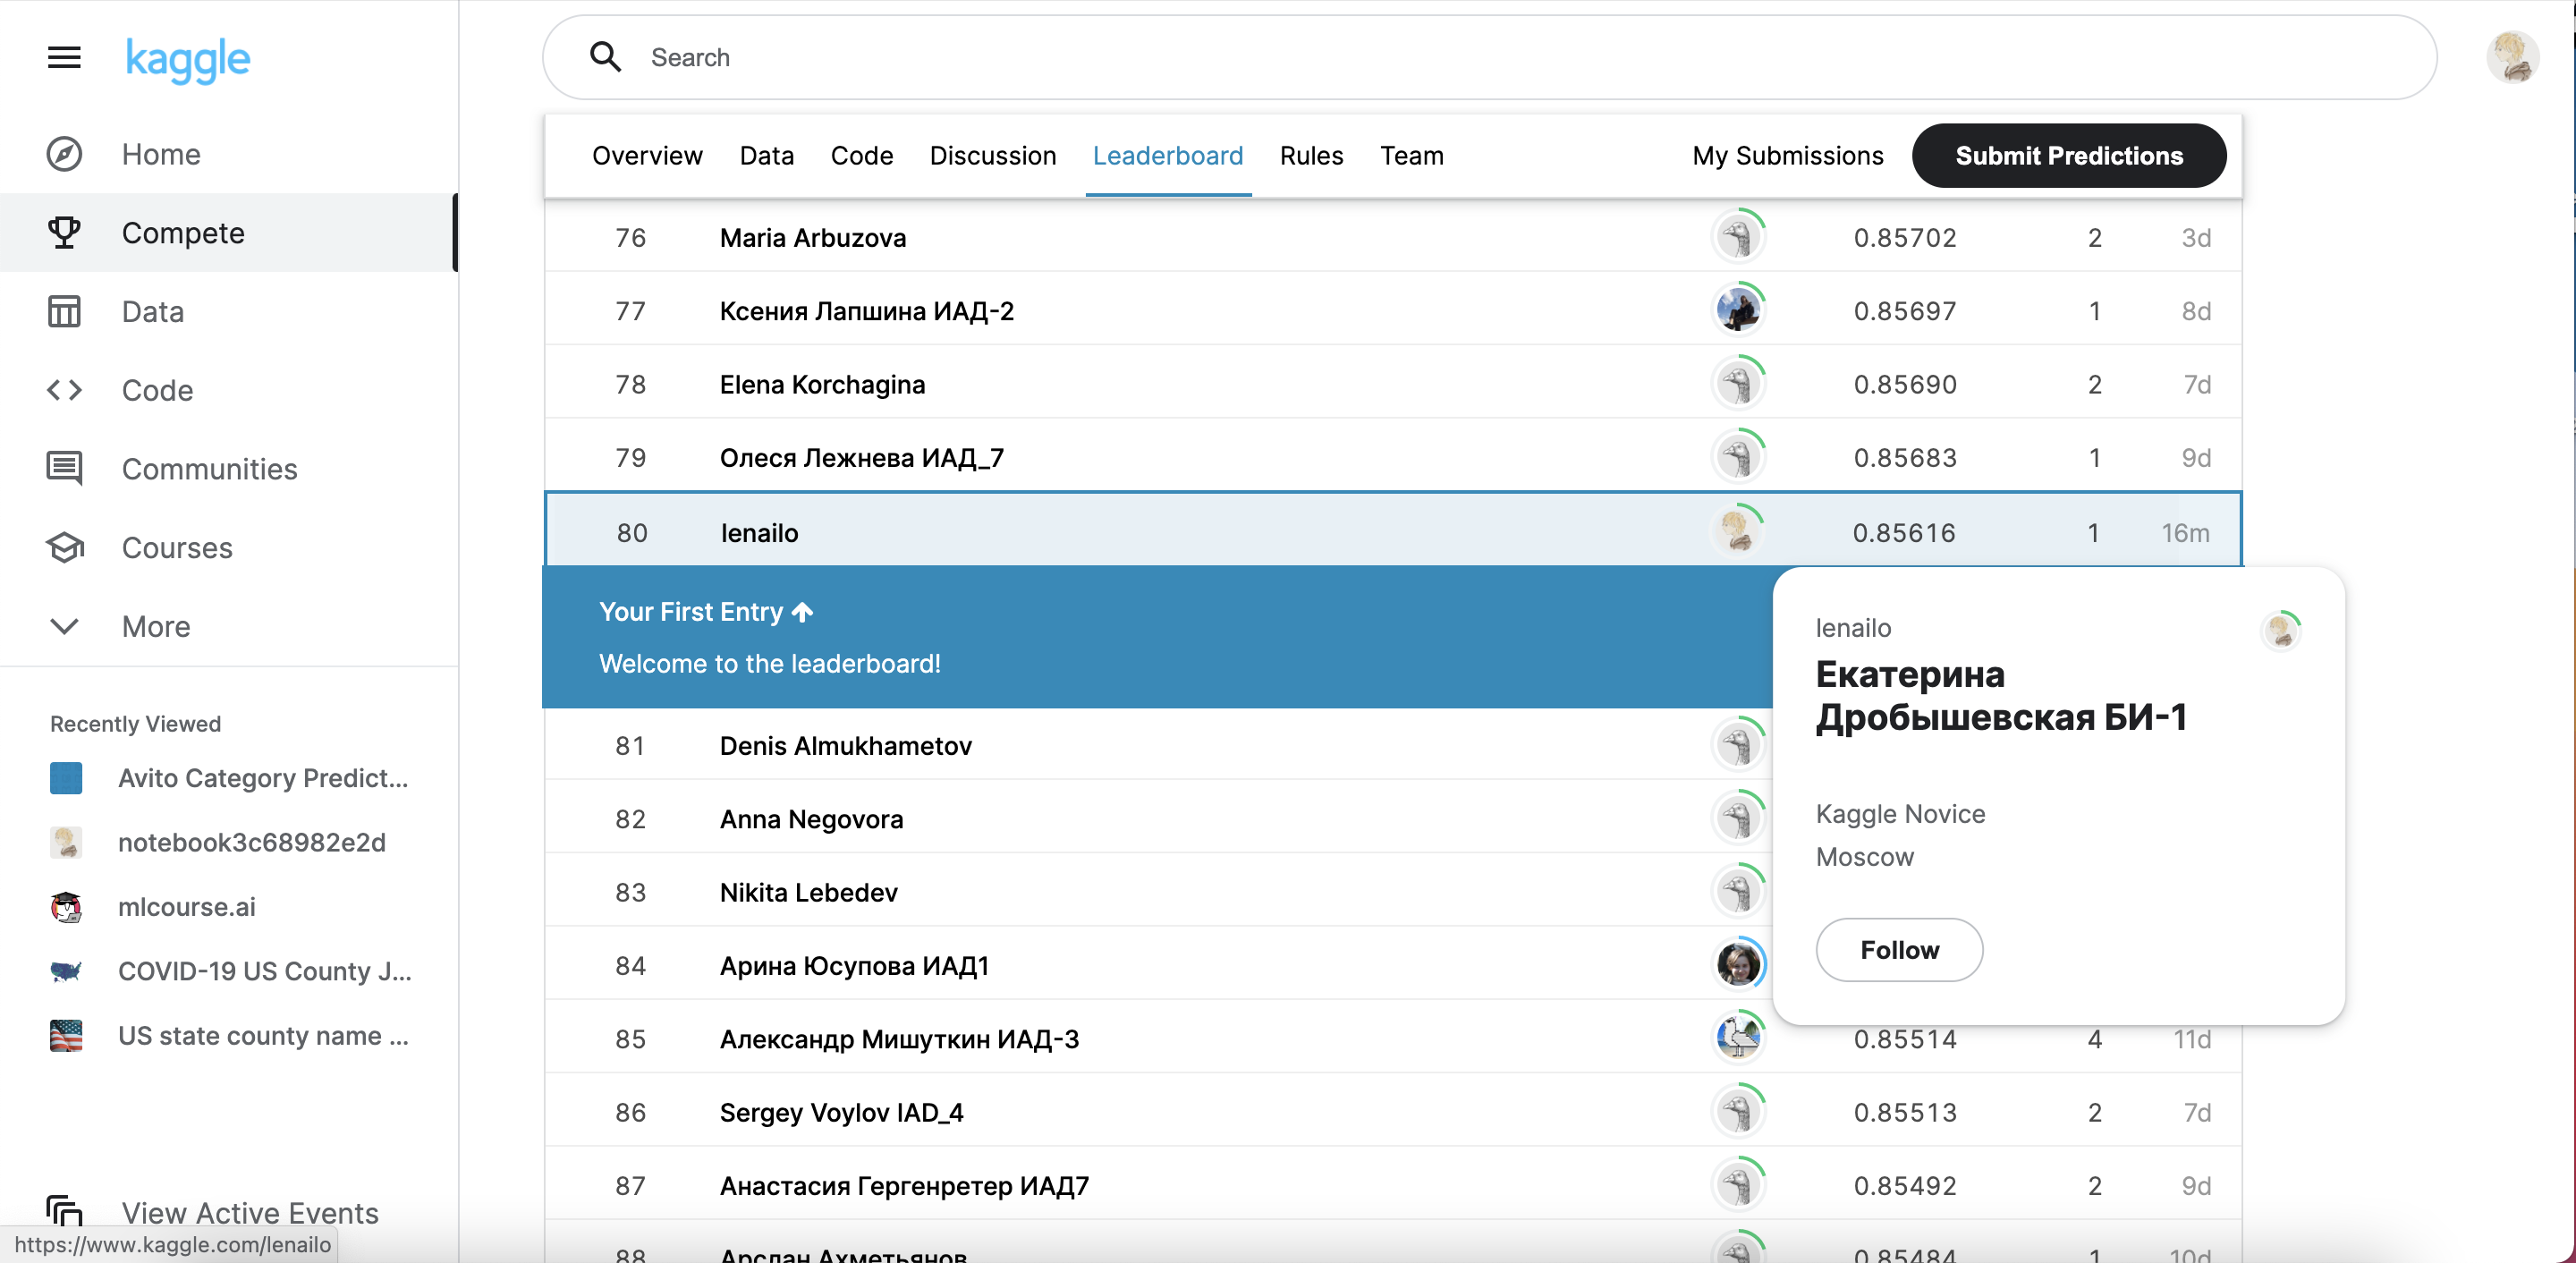